IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

ALJANE Noura 28600768

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [58]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [60]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [61]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [62]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [63]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [64]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [65]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

# Mise en place et introduction

 <div class="alert alert-block alert-info">Ce projet se concentre sur l'exploitation des données fournies par Agribalyse, projet axé sur l'analyse de l'impact environnemental des produits alimentaires. Nous nous intéressons particulièrement à l'application d'algorithmes d'apprentissage supervisé et non supervisé pour extraire des informations significatives de ces données.

En analysant et en traitant les données, nous cherchons à préparer le terrain pour l'application des techniques d'apprentissage. L'objectif est d'utiliser des approches supervisées pour prédire l'impact sur la santé des produits alimentaires en fonction de leurs caractéristiques, et des méthodes non supervisées pour identifier des modèles et des regroupements dans les données.
 
    
<b>Problématiques supervisées :</b>

Classification des produits alimentaires en fonction de leur impact sur la santé.
    
<b>Problématiques non supervisées :</b>

Clustering des produits alimentaires en fonction de leurs caractéristiques environnementales.</div>

# Analyse des données

### Synthèse :

In [66]:
data_synthese

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.520,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,"viandes, œufs, poissons",viandes crues,"Veau, steak haché 20% MG, cru","Veal, minced steak, 20% fat, raw",2,0,Glacé,PS,...,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.00,0.000038
2513,6582,6582,"viandes, œufs, poissons",viandes cuites,"Veau, tête, bouillie/cuite à l'eau","Calf, head, boiled/cooked in water",2,0,Glacé,PS,...,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.00,0.000041
2514,26146,26146,"viandes, œufs, poissons",poissons crus,"Vivaneau, cru","Snapper, raw",2,0,Glacé,PS,...,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.60,0.000163
2515,26147,26147,"viandes, œufs, poissons",poissons cuits,"Vivaneau, cuit","Snapper, cooked",2,0,Glacé,PP,...,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.30,0.000203


In [67]:
data_synthese.describe()

,Code CIQUAL,code saison,code avion,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2.517000e+03,...,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,22121.732618,1.997616,0.000795,2.768164,0.688960,5.420520,5.383362e-07,1.016822,0.021626,5.735583e-07,...,3.885454e-09,0.078953,0.000842,0.028194,0.310529,54.213324,328.598126,5.726230,49.799158,2.201983e-05
std,13835.394294,0.062999,0.028183,0.553206,0.877068,7.760284,4.868753e-06,1.595941,0.044096,8.893528e-07,...,4.773390e-09,0.128077,0.002039,0.050167,0.532352,65.129370,663.745740,18.063484,54.560796,4.340914e-05
min,1.000000,0.000000,0.000000,1.200000,0.013000,0.039400,2.710000e-09,0.023000,0.000120,5.370000e-09,...,5.850000e-11,0.000499,0.000013,0.000213,0.001140,0.678000,-40.000000,-23.100000,1.710000,6.180000e-07
25%,12726.000000,2.000000,0.000000,2.380000,0.161000,1.120000,1.200000e-07,0.302000,0.003570,8.110000e-08,...,9.600000e-10,0.009500,0.000203,0.005310,0.034100,13.500000,33.600000,0.905000,19.900000,7.270000e-06
50%,20500.000000,2.000000,0.000000,2.680000,0.356000,2.500000,2.060000e-07,0.670000,0.007240,2.370000e-07,...,2.360000e-09,0.031200,0.000444,0.012800,0.118000,34.100000,126.000000,2.090000,30.800000,1.280000e-05
75%,26090.000000,2.000000,0.000000,3.090000,0.874000,6.280000,5.650000e-07,1.100000,0.018000,7.060000e-07,...,5.020000e-09,0.094200,0.000862,0.028600,0.327000,63.900000,306.000000,5.410000,61.200000,2.480000e-05
max,96778.000000,2.000000,1.000000,4.870000,5.970000,52.200000,2.430000e-04,30.400000,0.390000,6.240000e-06,...,6.370000e-08,0.920000,0.032700,0.671000,4.070000,1090.000000,5580.000000,478.000000,711.000000,1.290000e-03


In [68]:
data_synthese.dtypes

Code AGB                                                                     object
Code CIQUAL                                                                   int64
Groupe d'aliment                                                             object
Sous-groupe d'aliment                                                        object
Nom du Produit en Français                                                   object
LCI Name                                                                     object
code saison                                                                   int64
code avion                                                                    int64
Livraison                                                                    object
Matériau d'emballage                                                         object
Préparation                                                                  object
DQR                                                                         

In [69]:
data_synthese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 29 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Code AGB                                                                  2517 non-null   object 
 1   Code CIQUAL                                                               2517 non-null   int64  
 2   Groupe d'aliment                                                          2517 non-null   object 
 3   Sous-groupe d'aliment                                                     2517 non-null   object 
 4   Nom du Produit en Français                                                2517 non-null   object 
 5   LCI Name                                                                  2517 non-null   object 
 6   code saison                                                     

### Etapes

In [70]:
data_etapes

,Code AGB,Code CIQUAL,Groupe d aliment,Sous-groupe d aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Agriculture,Transformation,...,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16,DQR Overall,P,TiR,GR,TeR
0,11084,11084,aides culinaires et ingrédients divers,algues,Agar (algue). cru,Seaweed. agar. raw,2.99,Agar (algue). cru (11084),0.654812,0.500987,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
1,11023,11023,aides culinaires et ingrédients divers,herbes,Ail séché. poudre,Garlic. powder. dried,4.11,Ail séché. poudre (11023),0.032661,0.000000,...,0.003464,0.000671,0.000440,0.000000,0.006605,4.11,4.27,4.39,2.79,5.00
2,11000,11000,aides culinaires et ingrédients divers,herbes,Ail. cru,Garlic. fresh,3.54,Ail. cru (11000),0.040826,0.000000,...,0.000000,0.000614,0.000550,0.000016,0.003717,3.54,2.74,4.28,2.80,4.34
3,11093,11093,aides culinaires et ingrédients divers,herbes,Aneth. frais,Dill. fresh,3.75,Aneth. frais (11093),0.082933,0.000000,...,0.001150,0.000583,0.000550,0.000016,0.004779,3.75,2.74,3.62,4.33,4.33
4,20995,20995,aides culinaires et ingrédients divers,algues,Ao-nori (Enteromorpha sp.). séchée ou déshydratée,Sea lettuce (Enteromorpha sp.). dried or dehyd...,2.99,Ao-nori (Enteromorpha sp.). séchée ou déshydra...,0.654812,0.500987,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,viandes. œufs. poissons,viandes crues,Veau. steak haché 20% MG. cru,Veal. minced steak. 20% fat. raw,2.47,Veau. steak haché 20% MG. cru (6535),2.085451,0.045533,...,0.000034,0.000926,0.000914,0.000263,0.038303,2.47,3.77,2.02,2.01,2.08
2513,6582,6582,viandes. œufs. poissons,viandes cuites,Veau. tête. bouillie/cuite à l eau,Calf. head. boiled/cooked in water,2.45,Veau. tête. bouillie/cuite à l eau (6582),2.147376,0.010702,...,0.000053,0.001432,0.001443,0.002279,0.041251,2.45,3.66,1.28,2.04,2.82
2514,26146,26146,viandes. œufs. poissons,poissons crus,Vivaneau. cru,Snapper. raw,3.68,Vivaneau. cru (26146),0.719615,0.000000,...,0.000034,0.003652,0.000914,0.000263,0.163057,3.68,4.60,2.54,2.59,5.00
2515,26147,26147,viandes. œufs. poissons,poissons cuits,Vivaneau. cuit,Snapper. cooked,3.56,Vivaneau. cuit (26147),0.878692,0.000000,...,0.000939,0.004459,0.001116,0.003711,0.203390,3.56,4.30,2.62,2.34,5.00


In [71]:
data_etapes.describe()

,Code CIQUAL,DQR,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total,Agriculture.1,...,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16,DQR Overall,P,TiR,GR,TeR
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,22121.732618,2.768179,0.568497,0.056137,0.022427,0.026166,0.007877,0.007634,0.688737,4.283405,...,0.001663,0.001282,0.000780,0.000709,0.021980,2.768179,3.037121,2.581499,2.418663,3.035769
std,13835.394294,0.553180,0.846357,0.113741,0.029187,0.035878,0.005025,0.012183,0.878109,7.485869,...,0.003530,0.001305,0.000511,0.001195,0.043352,0.553180,0.836334,0.837981,0.902672,0.988390
min,1.000000,1.200000,0.000000,-0.069140,0.000000,0.000229,0.000000,0.000000,0.012978,0.000000,...,0.000000,0.000007,0.000000,0.000000,0.000618,1.200000,1.140000,1.000000,1.000000,1.090000
25%,12726.000000,2.380000,0.080592,0.001440,0.015065,0.014988,0.004642,0.000000,0.158600,0.389160,...,0.000046,0.000654,0.000443,0.000000,0.007195,2.380000,2.400000,2.020000,1.720000,2.260000
50%,20500.000000,2.680000,0.241774,0.031835,0.018973,0.017594,0.008938,0.002455,0.355309,1.545345,...,0.000765,0.000946,0.000912,0.000263,0.012741,2.680000,2.870000,2.540000,2.330000,2.930000
75%,26090.000000,3.090000,0.678931,0.056153,0.023715,0.024428,0.009087,0.006509,0.874124,4.922460,...,0.001043,0.001225,0.000915,0.000698,0.024825,3.090000,3.690000,3.130000,3.020000,3.630000
max,96778.000000,4.870000,5.870899,2.474593,0.885589,0.897575,0.050257,0.130910,5.984957,51.263481,...,0.042448,0.015264,0.005081,0.006954,1.286939,4.870000,5.000000,4.840000,4.920000,5.000000


In [72]:
data_etapes.dtypes

Code AGB                       object
Code CIQUAL                     int64
Groupe d aliment               object
Sous-groupe d aliment          object
Nom du Produit en Français     object
                               ...   
DQR Overall                   float64
P                             float64
TiR                           float64
GR                            float64
TeR                           float64
Length: 132, dtype: object

In [73]:
print(list(data_etapes.columns))

['Code AGB', 'Code CIQUAL', 'Groupe d aliment', 'Sous-groupe d aliment', 'Nom du Produit en Français', 'LCI Name', 'DQR', 'Nom et code', 'Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', 'Consommation', 'Total', 'Agriculture.1', 'Transformation.1', 'Emballage.1', 'Transport.1', 'Supermarché et distribution.1', 'Consommation.1', 'Total.1', 'Agriculture.2', 'Transformation.2', 'Emballage.2', 'Transport.2', 'Supermarché et distribution.2', 'Consommation.2', 'Total.2', 'Agriculture.3', 'Transformation.3', 'Emballage.3', 'Transport.3', 'Supermarché et distribution.3', 'Consommation.3', 'Total.3', 'Agriculture.4', 'Transformation.4', 'Emballage.4', 'Transport.4', 'Supermarché et distribution.4', 'Consommation.4', 'Total.4', 'Agriculture.5', 'Transformation.5', 'Emballage.5', 'Transport.5', 'Supermarché et distribution.5', 'Consommation.5', 'Total.5', 'Agriculture.6', 'Transformation.6', 'Emballage.6', 'Transport.6', 'Supermarché et distribution.6', 'Co

### Ingredients

In [74]:
data_ingredients

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500000,90.100000,0.310000,8.090000,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310000,9.060000,0.144000,15.300000,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900000,99.200000,0.455000,23.400000,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580000,54.300000,1.950000,1.720000,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231000,0.998000,0.165000,0.138000,1.520000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Viande,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.876827e-09,0.089629,0.000791,0.021372,0.385901,72.852216,283.404190,3.379838,60.658757,1.696759e-05
6852,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Lait demi-écremé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,1.559162e-10,0.002703,0.000026,0.000870,0.011714,2.737303,14.705075,0.076615,0.695539,5.546857e-07
6853,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Farine de blé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.501547e-10,0.003277,0.000048,0.002206,0.014150,4.221226,28.688275,0.095506,1.495995,9.948229e-07
6854,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Autres étapes,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.606422e-10,0.003243,0.000087,0.001362,0.008688,2.725231,4.999133,0.285816,32.821669,6.377483e-06


In [75]:
data_ingredients.describe()

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
count,6856.000000,6856.000000,6.856000e+03,6856.000000,6856.000000,6.856000e+03,6.856000e+03,6.856000e+03,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6.856000e+03
mean,0.149011,1.169492,9.663670e-08,0.321772,0.003868,1.152517e-07,2.553076e-08,9.025746e-10,0.015834,0.000171,0.005420,0.063775,13.456045,70.526629,1.362213,12.915748,4.652160e-06
std,0.355550,3.161317,2.282445e-07,0.767578,0.014506,3.474914e-07,6.527313e-08,1.944710e-09,0.049969,0.000351,0.012889,0.208651,27.594863,241.441559,3.761144,24.626797,8.361151e-06
min,-0.000112,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-15.503187,-8.652253,0.000000,0.000000e+00
25%,0.016439,0.094253,7.073821e-09,0.007764,0.000324,9.993775e-09,2.388881e-09,9.970011e-11,0.001315,0.000022,0.000612,0.005076,1.602371,4.570463,0.121583,0.783055,5.292807e-07
50%,0.052650,0.399105,2.168581e-08,0.034620,0.001029,2.751159e-08,7.216872e-09,2.722094e-10,0.003083,0.000064,0.001362,0.011002,3.338544,14.420779,0.268841,2.476098,1.672647e-06
75%,0.122588,0.870041,7.836687e-08,0.519909,0.002413,7.638745e-08,2.116846e-08,8.041754e-10,0.009967,0.000158,0.004636,0.041166,13.004471,57.160947,0.839133,19.499722,5.164050e-06
max,11.160181,109.758084,3.309474e-06,30.400000,0.314126,1.097432e-05,2.102707e-06,5.450166e-08,1.625662,0.008118,0.364995,7.169450,521.495145,8785.669314,38.128594,711.000000,1.930881e-04


In [76]:
data_ingredients.dtypes

Ciqual AGB                                                                   object
Ciqual code                                                                  object
Groupe d'aliment                                                             object
Sous-groupe d'aliment                                                        object
Nom Français                                                                 object
LCI Name                                                                     object
Ingredients                                                                  object
Code et Nom                                                                  object
Groupe                                                                       object
Sous-groupe                                                                  object
Formation photochimique d'ozone                                             float64
Particules fines                                                            

# Traitement des données

Pour prédire les effets toxicologiques généraux d'un produit, nous pouvons combiner les informations provenant des deux attributs relatifs aux effets toxicologiques. En calculant une valeur seuil basée sur cette combinaison, nous pouvons déterminer le meilleur point de séparation pour obtenir une classification binaire sur laquelle nous pouvons appliquer nos algorithmes. 

L'idée derrière l'utilisation de la médiane comme seuil est la suivante : plus la valeur calculée pour un aliment est élevée et dépasse le seuil, plus cet aliment est susceptible d'avoir des effets toxiques sur la santé humaine. Cependant, il est essentiel de garder à l'esprit que cette classification est basée sur des données et des seuils déterminés de manière arbitraire, et ne doit pas être interprétée comme une évaluation définitive de la toxicité réelle des produits. Pour obtenir des prédictions plus fiables, il serait nécessaire de disposer de valeurs de seuils de toxicité basées sur des critères scientifiques solides, tels que le risque de développement de cellules cancéreuses ou de maladies.

In [77]:
data_synthese["Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes"]

0       6.480000e-09
1       4.660000e-10
2       2.980000e-10
3       6.190000e-10
4       6.480000e-09
            ...     
2512    1.080000e-08
2513    1.120000e-08
2514    4.020000e-09
2515    5.000000e-09
2516    4.910000e-09
Name: Effets toxicologiques sur la santé humaine : substances cancérogènes, Length: 2517, dtype: float64

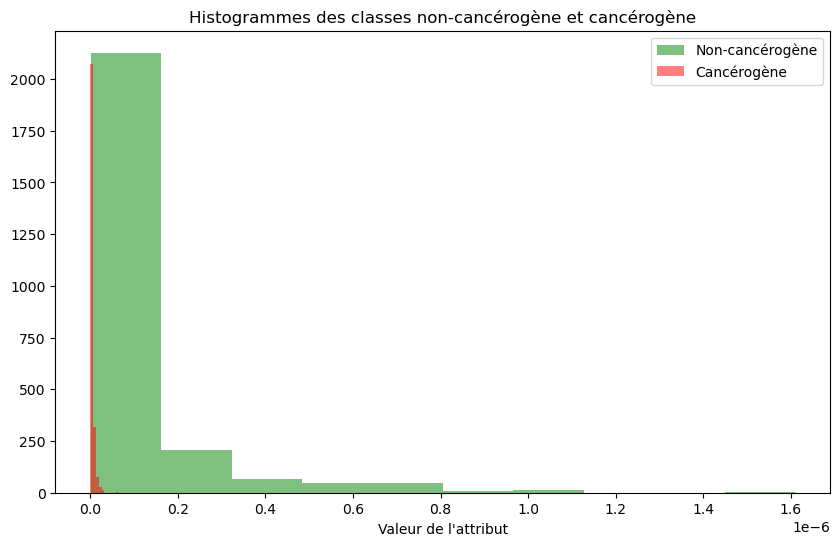

In [101]:

# Séparation des sous-ensembles pour chaque classe
non_cancer = data_synthese.iloc[:,18]
cancer = data_synthese.iloc[:,19]

# Tracé des histogrammes pour chaque classe
plt.figure(figsize=(10, 6))
plt.hist(non_cancer, bins=10, color='green', alpha=0.5, label="Non-cancérogène")
plt.hist(cancer, bins=10, color='red', alpha=0.5, label="Cancérogène")
plt.xlabel("Valeur de l'attribut")
plt.title("Histogrammes des classes non-cancérogène et cancérogène")
plt.legend()
plt.savefig('toxic-plot.png', transparent=True)
plt.show()


In [79]:
print(list(data_synthese)[11:])

['DQR', 'Score unique EF 3.1', 'Changement climatique', "Appauvrissement de la couche d'ozone", 'Rayonnements ionisants', "Formation photochimique d'ozone", 'Particules fines', 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes', 'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes', 'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces', 'Eutrophisation marine', 'Eutrophisation terrestre', "Écotoxicité pour écosystèmes aquatiques d'eau douce", 'Utilisation du sol', 'Épuisement des ressources eau', 'Épuisement des ressources énergétiques', 'Épuisement des ressources minéraux']


In [80]:
df = data_synthese.copy()
cols = list(data_synthese)[11:]#liste contenant les noms des attributs numériques
df = df[cols] #on séléctionne ces attributs numériques dans la dataframe
effets = ['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes','Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes']
#on créer une liste contenant les attributs qui nous intéressent

(array([2.127e+03, 2.090e+02, 6.700e+01, 4.500e+01, 4.900e+01, 6.000e+00,
        1.100e+01, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([6.34250000e-10, 8.42558250e-08, 1.67877400e-07, 2.51498975e-07,
        3.35120550e-07, 4.18742125e-07, 5.02363700e-07, 5.85985275e-07,
        6.69606850e-07, 7.53228425e-07, 8.36850000e-07]),
 <BarContainer object of 10 artists>)

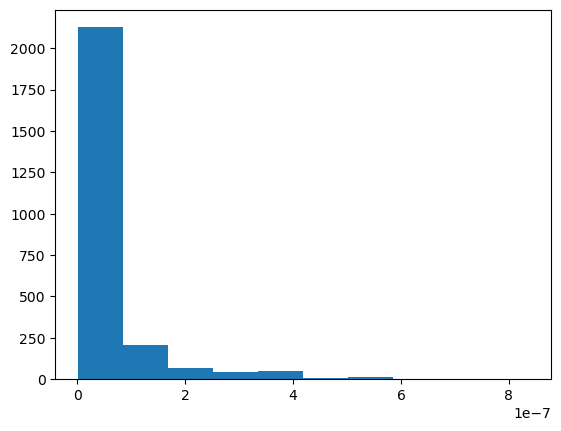

In [81]:
X = np.array(df[df.columns.difference(effets)]) #sélectionne toutes les colonnes sauf celle des effets
Y = np.mean(np.array(df[effets]),axis=1) #
plt.hist(Y)

In [82]:
X.shape

(2517, 16)

In [83]:
Q = np.percentile(Y, 50,interpolation = 'midpoint')
Y = np.where(Y<Q,-1,1)

In [84]:
print(list(data_synthese))

['Code AGB', 'Code CIQUAL', "Groupe d'aliment", "Sous-groupe d'aliment", 'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion', 'Livraison', "Matériau d'emballage", 'Préparation', 'DQR', 'Score unique EF 3.1', 'Changement climatique', "Appauvrissement de la couche d'ozone", 'Rayonnements ionisants', "Formation photochimique d'ozone", 'Particules fines', 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes', 'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes', 'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces', 'Eutrophisation marine', 'Eutrophisation terrestre', "Écotoxicité pour écosystèmes aquatiques d'eau douce", 'Utilisation du sol', 'Épuisement des ressources eau', 'Épuisement des ressources énergétiques', 'Épuisement des ressources minéraux']


# Algorithme Supervisé

Rappellons notre problématique : 



### Perceptron 

In [94]:
index = np.random.permutation(len(X)) # mélange des index
XbinMelange = X[index]
YbinMelange = Y[index]

niter = 10
accuracies_test_perceptron=[]
dim = XbinMelange.shape[1]
learning_rate=0.001
DQR_moyen = 0
for i in range(niter):
    perceptron = cl.ClassifierPerceptron(dim,learning_rate)
    Xapp,Yapp,Xtest,Ytest = ev.crossval_strat(XbinMelange, YbinMelange,niter,i)
    perceptron.train(Xapp, Yapp)
    predictions = [perceptron.predict(x) for x in Xapp]
    acc=perceptron.accuracy(Xtest, Ytest)
    print("Itération  "+str(i)+" : taille base app.= "+str(len(Xapp))+" taille base test= "+str(len(Xtest))+" Taux de bonne classif: "+str(acc))
    print("Nombre d'erreurs : ", np.sum(predictions != Yapp))
    print("\n")
    accuracies_test_perceptron.append(acc)

Itération  0 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.8605577689243028
Nombre d'erreurs :  282


Itération  1 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.8406374501992032
Nombre d'erreurs :  284


Itération  2 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.8286852589641435
Nombre d'erreurs :  291


Itération  3 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.8565737051792829
Nombre d'erreurs :  296


Itération  4 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.701195219123506
Nombre d'erreurs :  694


Itération  5 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.7729083665338645
Nombre d'erreurs :  415


Itération  6 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.6733067729083665
Nombre d'erreurs :  759


Itération  7 : taille base app.= 2266 taille base test= 251 Taux de bonne classif: 0.8725099601593626
Nom

In [95]:
print("Performances du modèle : ", accuracies_test_perceptron)
print("Moyenne et variance des performances : ", ev.analyse_perfs(accuracies_test_perceptron))

Performances du modèle :  [0.8605577689243028, 0.8406374501992032, 0.8286852589641435, 0.8565737051792829, 0.701195219123506, 0.7729083665338645, 0.6733067729083665, 0.8725099601593626, 0.8565737051792829, 0.8605577689243028]
Moyenne et variance des performances :  (0.8123505976095616, 0.06818338379555748)


### KNN

In [96]:
# on stocke les accuracies dans une liste :
accuracies_test_knn = []

seuil_k = 10
dim = X.shape[1]


#validation croisée 
Xapp,Yapp,X_test,Y_test = ev.crossval(X, Y,5,2)

#valeurs de k à regarder
valeurs_k = [k for k in range(1,seuil_k,2)]

for k in valeurs_k:
    classifierKNN = cl.ClassifierKNN(dim,k)
    #Entraînement :
    classifierKNN.train(Xapp,Yapp)
    #Acccuracies pour test : 
    tmp = classifierKNN.accuracy(X_test,Y_test)
    print("Taux de bonne classification pour ",k," voisins : ",tmp)
    accuracies_test_knn.append(tmp)


Taux de bonne classification pour  1  voisins :  0.9005964214711729
Taux de bonne classification pour  3  voisins :  0.8866799204771372
Taux de bonne classification pour  5  voisins :  0.8986083499005965
Taux de bonne classification pour  7  voisins :  0.882703777335984
Taux de bonne classification pour  9  voisins :  0.8767395626242545


Le k optimal est : 1


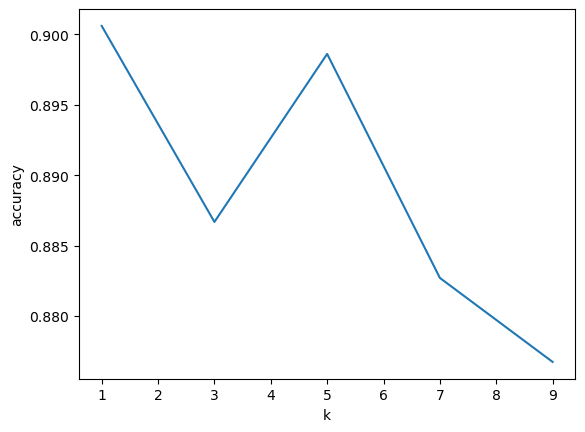

In [97]:
plt.plot(valeurs_k,accuracies_test_knn)
plt.xlabel("k")
plt.ylabel("accuracy")
k_optimal=valeurs_k[np.argmax(accuracies_test_knn)]
print("Le k optimal est :",k_optimal)

Or nous savons que lorsque le nombre de voisins est 1,  on risque de faire du sur-apprentissage. D'après le graphique, on observe qu"une deuxième bonne valeur pour le knn serait 5.

In [98]:
index = np.random.permutation(len(X)) # mélange des index
XbinMelange = X[index]
YbinMelange = Y[index]

k_optimal = 5
niter = 10
liste_classif = []
accuracies_knn=[]
for i in range(1,niter):
    Xapp,Yapp,X_test,Y_test = ev.crossval(XbinMelange, YbinMelange,niter,i)
    knn = cl.ClassifierKNN(dim,k_optimal)
    knn.train(Xapp, Yapp)
    predictions = [perceptron.predict(x) for x in Xapp]
    acc=knn.accuracy(X_test, Y_test)
    accuracies_knn.append(acc)
    print("Itération ", i, ": taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test), " Taux de bonne classif: ", acc)
    print("Nombre d'erreurs : ", np.sum(predictions != Yapp))
    print("\n")

Itération  1 : taille base appretissage =  2266  taille base de test =  251  Taux de bonne classif:  0.9322709163346613
Nombre d'erreurs :  308


Itération  2 : taille base appretissage =  2266  taille base de test =  251  Taux de bonne classif:  0.9402390438247012
Nombre d'erreurs :  314


Itération  3 : taille base appretissage =  2266  taille base de test =  251  Taux de bonne classif:  0.9322709163346613
Nombre d'erreurs :  305


Itération  4 : taille base appretissage =  2266  taille base de test =  251  Taux de bonne classif:  0.9282868525896414
Nombre d'erreurs :  309


Itération  5 : taille base appretissage =  2266  taille base de test =  251  Taux de bonne classif:  0.9243027888446215
Nombre d'erreurs :  304


Itération  6 : taille base appretissage =  2266  taille base de test =  251  Taux de bonne classif:  0.9243027888446215
Nombre d'erreurs :  314


Itération  7 : taille base appretissage =  2266  taille base de test =  251  Taux de bonne classif:  0.9322709163346613
Nomb

In [99]:
print("Performances du modèle : ", accuracies_knn)
print("Moyenne et variance des performances : ", ev.analyse_perfs(accuracies_knn))

Performances du modèle :  [0.9322709163346613, 0.9402390438247012, 0.9322709163346613, 0.9282868525896414, 0.9243027888446215, 0.9243027888446215, 0.9322709163346613, 0.9203187250996016, 0.9322709163346613]
Moyenne et variance des performances :  (0.9296148738379814, 0.005634316981566134)


# Algorithme Non Supervisé

Prenons 2 attributs de la base de données synthese tel que "Changement climatique" et "Score Unique EF". Nous allons essayer de regrouper les produits alimentaires qui ont des similarités au niveau de leur impact environnemental. On peut utiliser pour cela l'algorithme des k-moyennes. 

In [33]:
data_synthese["Groupe d'aliment"].unique()

array(['aides culinaires et ingrédients divers', 'aliments infantiles',
       'boissons', 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux', 'glaces et sorbets',
       'lait et produits laitiers', 'matières grasses',
       'produits céréaliers', 'produits sucrés',
       'viandes, œufs, poissons'], dtype=object)

Iteration 0 Inertie : 110.2313 Difference: 110.2313
Iteration 1 Inertie : 110.2313 Difference: 0.0000
Iteration 0 Inertie : 41.8130 Difference: 41.8130
Iteration 1 Inertie : 39.4051 Difference: 2.4079
Iteration 2 Inertie : 38.6020 Difference: 0.8031
Iteration 3 Inertie : 38.3986 Difference: 0.2034
Iteration 4 Inertie : 38.3927 Difference: 0.0059
Iteration 0 Inertie : 19.4406 Difference: 19.4406
Iteration 1 Inertie : 18.8705 Difference: 0.5702
Iteration 2 Inertie : 18.7845 Difference: 0.0860
Iteration 3 Inertie : 18.7176 Difference: 0.0668
Iteration 4 Inertie : 18.5773 Difference: 0.1404
Iteration 5 Inertie : 18.5498 Difference: 0.0275
Iteration 0 Inertie : 26.3563 Difference: 26.3563
Iteration 1 Inertie : 20.4271 Difference: 5.9292
Iteration 2 Inertie : 15.8384 Difference: 4.5887
Iteration 3 Inertie : 14.3993 Difference: 1.4391
Iteration 4 Inertie : 13.4177 Difference: 0.9816
Iteration 5 Inertie : 12.9255 Difference: 0.4922
Iteration 6 Inertie : 12.7019 Difference: 0.2236
Iteration 7 I

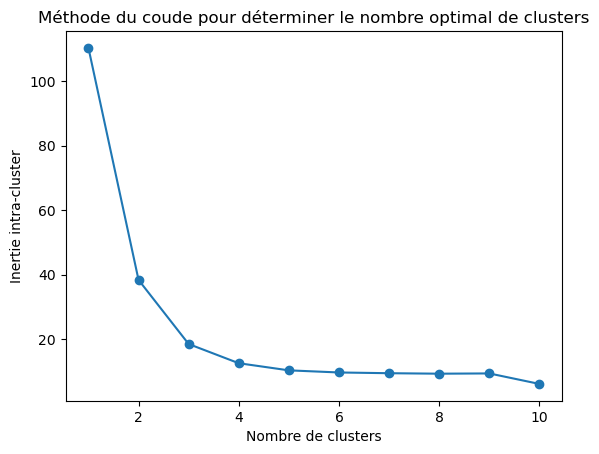

In [56]:

# Sélectionner les attributs d'intérêt
selected_features = ['Changement climatique', 'Score unique EF 3.1']
df = data_synthese[selected_features]

# Normalisation des données
X = clust.normalisation(df)

# Appliquer la méthode du coude pour déterminer le nombre optimal de clusters
inerties = []
max_clusters = 10  # Nombre maximal de clusters à tester

for k in range(1, max_clusters+1):
    C, U = clust.kmoyennes(k, X, 0.05, 100, verbose=False)
    ig_cur = clust.inertie_globale(X, U)
    inerties.append(ig_cur)

# Tracer la courbe de la méthode du coude
plt.plot(range(1, max_clusters+1), inerties, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-cluster')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.savefig('elbow-method.png', transparent=True)
plt.show()


D'après le graphique on observe que le point d'inflexion où l'inertie globale cesse de diminiuer est 4. On peut donc utiliser 4 clusters pour appliquer notre algorithme des k moyennes

Iteration 0 Inertie : 23.6450 Difference: 23.6450
Iteration 1 Inertie : 14.5489 Difference: 9.0962
Iteration 2 Inertie : 12.9197 Difference: 1.6292
Iteration 3 Inertie : 12.6366 Difference: 0.2831
Iteration 4 Inertie : 12.6056 Difference: 0.0310


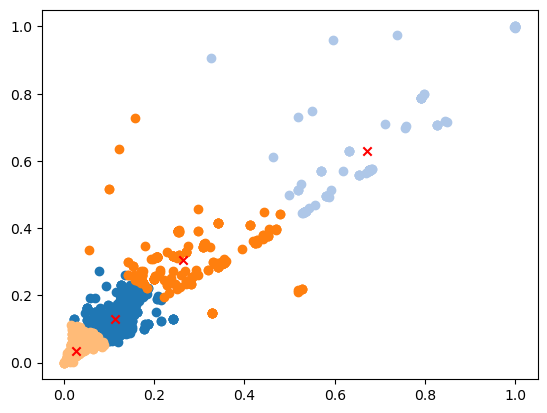

In [53]:
C, U = clust.kmoyennes(4, X, 0.05, 1000, verbose=False)
clust.affiche_resultat(X,C,U)

**

In [54]:
print(C)

[[0.11432155 0.13059644]
 [0.67070566 0.63052671]
 [0.26428766 0.30511136]
 [0.02783685 0.03337162]]


In [55]:
U_clusters = [U[cluster] for cluster in range(4)]  # Liste des matrices d'affectation pour chaque cluster
groupes_aliment = np.asarray(data_synthese["Groupe d'aliment"])  # Attribut "Groupe d'aliment" pour chaque point

#Initialiser les dictionnaires pour chaque cluster
dictionnaires_clusters = [{} for _ in range(4)]

#Compter les occurrences des groupes d'aliments dans chaque cluster
for cluster, U_cluster in enumerate(U_clusters):
    unique_groupes, counts = np.unique(groupes_aliment[U_cluster], return_counts=True)
    dictionnaires_clusters[cluster] = dict(zip(unique_groupes, counts))

#Afficher les résultats
for cluster, dictionnaire in enumerate(dictionnaires_clusters):
    print(f"Cluster {cluster}: {dictionnaire}")


Cluster 0: {'aides culinaires et ingrédients divers': 34, 'aliments infantiles': 2, 'boissons': 4, 'entrées et plats composés': 74, 'fruits, légumes, légumineuses et oléagineux': 39, 'lait et produits laitiers': 123, 'matières grasses': 16, 'produits céréaliers': 76, 'produits sucrés': 19, 'viandes, œufs, poissons': 268}
Cluster 1: {'boissons': 2, 'entrées et plats composés': 2, 'viandes, œufs, poissons': 99}
Cluster 2: {'aides culinaires et ingrédients divers': 15, 'aliments infantiles': 2, 'boissons': 6, 'entrées et plats composés': 37, 'fruits, légumes, légumineuses et oléagineux': 4, 'lait et produits laitiers': 4, 'matières grasses': 2, 'produits sucrés': 7, 'viandes, œufs, poissons': 197}
Cluster 3: {'aides culinaires et ingrédients divers': 111, 'aliments infantiles': 29, 'boissons': 216, 'entrées et plats composés': 179, 'fruits, légumes, légumineuses et oléagineux': 383, 'glaces et sorbets': 25, 'lait et produits laitiers': 96, 'matières grasses': 38, 'produits céréaliers': 30

Le cluster 2, caractérisé par des valeurs élevées pour les attributs du changement climatique et du score unique EF, est principalement composé de plats et aliments appartenant à la catégorie viandes, oeufs et poissons. En revanche, le cluster 4 présente des valeurs plus faibles pour ces attributs et est principalement composé de fruits, légumes et boissons. Ces observations suggèrent que les produits alimentaires issus de viandes et d'animaux ont tendance à avoir un impact significatif sur le changement climatique et un score EF plus élévé.